## Linear Regression Machine Learning Implementation, Case: South Jakarta House Price
## Part 3: Linear Regression Implementation
### Author: Edycakra Immanuel Sinaga

In [178]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
%matplotlib inline

Load Dataset

In [201]:
df = pd.read_csv('../data/final/olx_house_final_ENG.csv', encoding='latin-1')

In [202]:
df.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,CERT,LOC,Price
0,5,5,2,133,200,SHM,Jagakarsa,2460000000
1,6,1,1,148,148,SHM,Setia Budi,1100000000
2,5,4,3,84,200,SHM,Tebet,2100000000
3,4,3,2,160,190,SHM,Cilandak,3600000000
4,3,3,2,134,130,SHM,Pasar Minggu,2800000000


Splitting Data: Separate Features and Target

In [203]:
X = df.drop(columns=["Price"])
y = np.log(df["Price"])


In [204]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NBED    298 non-null    int64 
 1   NBATH   298 non-null    int64 
 2   NFLOOR  298 non-null    int64 
 3   BLDAR   298 non-null    int64 
 4   LNDAR   298 non-null    int64 
 5   CERT    298 non-null    object
 6   LOC     298 non-null    object
dtypes: int64(5), object(2)
memory usage: 16.4+ KB


In [205]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 298 entries, 0 to 297
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
298 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


One Hot Encode the Categorical Attributes before Separating Train and Test

In [206]:
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(), ["CERT", "LOC"]), remainder='passthrough')

transformed = transformer.fit_transform(X)
X_transformed = pd.DataFrame(transformed, columns=transformer.get_feature_names())
X_transformed.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   onehotencoder__x0_HGB               298 non-null    float64
 1   onehotencoder__x0_Lainnya           298 non-null    float64
 2   onehotencoder__x0_SHM               298 non-null    float64
 3   onehotencoder__x1_Cilandak          298 non-null    float64
 4   onehotencoder__x1_Jagakarsa         298 non-null    float64
 5   onehotencoder__x1_Kebayoran Baru    298 non-null    float64
 6   onehotencoder__x1_Kebayoran Lama    298 non-null    float64
 7   onehotencoder__x1_Mampang Prapatan  298 non-null    float64
 8   onehotencoder__x1_Pancoran          298 non-null    float64
 9   onehotencoder__x1_Pasar Minggu      298 non-null    float64
 10  onehotencoder__x1_Pesanggrahan      298 non-null    float64
 11  onehotencoder__x1_Setia Budi        298 non-n

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Splitting Data: Separate Train and Test

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.15, random_state=2)


In [208]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 74 to 168
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   onehotencoder__x0_HGB               253 non-null    float64
 1   onehotencoder__x0_Lainnya           253 non-null    float64
 2   onehotencoder__x0_SHM               253 non-null    float64
 3   onehotencoder__x1_Cilandak          253 non-null    float64
 4   onehotencoder__x1_Jagakarsa         253 non-null    float64
 5   onehotencoder__x1_Kebayoran Baru    253 non-null    float64
 6   onehotencoder__x1_Kebayoran Lama    253 non-null    float64
 7   onehotencoder__x1_Mampang Prapatan  253 non-null    float64
 8   onehotencoder__x1_Pancoran          253 non-null    float64
 9   onehotencoder__x1_Pasar Minggu      253 non-null    float64
 10  onehotencoder__x1_Pesanggrahan      253 non-null    float64
 11  onehotencoder__x1_Setia Budi        253 non-

In [209]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 179 to 174
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   onehotencoder__x0_HGB               45 non-null     float64
 1   onehotencoder__x0_Lainnya           45 non-null     float64
 2   onehotencoder__x0_SHM               45 non-null     float64
 3   onehotencoder__x1_Cilandak          45 non-null     float64
 4   onehotencoder__x1_Jagakarsa         45 non-null     float64
 5   onehotencoder__x1_Kebayoran Baru    45 non-null     float64
 6   onehotencoder__x1_Kebayoran Lama    45 non-null     float64
 7   onehotencoder__x1_Mampang Prapatan  45 non-null     float64
 8   onehotencoder__x1_Pancoran          45 non-null     float64
 9   onehotencoder__x1_Pasar Minggu      45 non-null     float64
 10  onehotencoder__x1_Pesanggrahan      45 non-null     float64
 11  onehotencoder__x1_Setia Budi        45 non-n

Standardize the Dataset

In [210]:
#separate numerical and categorical attributes (we will onehotencode the categorical attributes later)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#for training data
X_train_num=X_train[["NBED", "NBATH", "NFLOOR", "BLDAR", "LNDAR"]].copy()
X_train_std = scaler.fit_transform(X_train_num)
X_train_std


array([[-0.26493002, -0.47071534,  0.19184843, -0.46342265, -0.64368334],
       [-0.26493002, -0.47071534,  0.19184843, -0.23636187,  0.70400993],
       [ 0.62876725, -0.47071534,  0.19184843,  0.17647591,  0.87247159],
       ...,
       [ 1.52246453,  1.26783913,  0.19184843,  0.05262458,  0.70400993],
       [-0.26493002, -0.47071534, -1.37388233,  2.2819486 ,  0.87247159],
       [ 0.62876725,  1.26783913,  0.19184843,  0.50674614,  0.87247159]])

In [211]:
#for test data
X_test_num=X_test[["NBED", "NBATH", "NFLOOR", "BLDAR", "LNDAR"]].copy()
# X_test_num.drop(columns=['CERT', 'LOC'], inplace=True)
X_test_std = scaler.fit_transform(X_test_num)
X_test_std

array([[-0.17413151, -0.4375    , -1.40563383, -0.90222172, -0.87799914],
       [-0.17413151,  0.5       ,  0.40160966,  0.02888144,  0.29933538],
       [-0.17413151, -0.4375    , -1.40563383,  0.43623907, -0.06425322],
       [-0.17413151,  1.4375    ,  0.40160966, -0.16509838,  0.76680644],
       [-0.17413151, -0.4375    ,  0.40160966,  2.00747566, -0.39321434],
       [-0.17413151,  0.5       ,  0.40160966,  1.19276039,  0.47247281],
       [-1.29354835, -1.375     , -1.40563383, -1.17379348, -1.25890149],
       [-1.29354835, -1.375     , -1.40563383, -0.55305804, -0.9818816 ],
       [-0.17413151, -0.4375    ,  0.40160966, -0.78583383, -0.79143043],
       [-0.17413151,  0.5       ,  0.40160966, -0.28148628,  0.71486521],
       [-1.29354835, -1.375     , -1.40563383, -0.39787418, -0.91262663],
       [-1.29354835, -1.375     , -1.40563383, -0.78583383, -1.08576406],
       [ 3.18411901,  3.3125    ,  0.40160966,  1.34794425,  2.89639682],
       [-0.17413151, -0.4375    ,  0.4

In [212]:
scaled_X_train = pd.DataFrame(X_train_std, index=X_train_num.index, columns=X_train_num.columns)
scaled_X_train.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR
74,-0.264930,-0.470715,0.191848,-0.463423,-0.643683
188,-0.264930,-0.470715,0.191848,-0.236362,0.704010
239,0.628767,-0.470715,0.191848,0.176476,0.872472
283,-0.264930,-0.470715,0.191848,0.609956,-0.390991
156,-0.264930,0.398562,0.191848,-0.277646,-0.677376


In [213]:
#add categorical columns to standardized numerical columns
X_train_new= scaled_X_train[["NBED", "NBATH", "NFLOOR", "BLDAR", "LNDAR"]].copy()
X_train_new["onehotencoder__x0_HGB"] = X_train["onehotencoder__x0_HGB"]
X_train_new["onehotencoder__x0_Lainnya"] = X_train["onehotencoder__x0_Lainnya"]
X_train_new["onehotencoder__x0_SHM"] = X_train["onehotencoder__x0_SHM"]
X_train_new["onehotencoder__x1_Cilandak"] = X_train["onehotencoder__x1_Cilandak"]
X_train_new["onehotencoder__x1_Jagakarsa"] = X_train["onehotencoder__x1_Jagakarsa"]
X_train_new["onehotencoder__x1_Kebayoran Baru"] = X_train["onehotencoder__x1_Kebayoran Baru"]
X_train_new["onehotencoder__x1_Kebayoran Lama"] = X_train["onehotencoder__x1_Kebayoran Lama"]
X_train_new["onehotencoder__x1_Mampang Prapatan"] = X_train["onehotencoder__x1_Mampang Prapatan"]
X_train_new["onehotencoder__x1_Pancoran"] = X_train["onehotencoder__x1_Pancoran"]
X_train_new["onehotencoder__x1_Pasar Minggu"] = X_train["onehotencoder__x1_Pasar Minggu"]
X_train_new["onehotencoder__x1_Pesanggrahan"] = X_train["onehotencoder__x1_Pesanggrahan"]
X_train_new["onehotencoder__x1_Setia Budi"] = X_train["onehotencoder__x1_Setia Budi"]
X_train_new["onehotencoder__x1_Tebet"] = X_train["onehotencoder__x1_Tebet"]

X_train_new.head()
# X_train.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,onehotencoder__x0_HGB,onehotencoder__x0_Lainnya,onehotencoder__x0_SHM,onehotencoder__x1_Cilandak,onehotencoder__x1_Jagakarsa,onehotencoder__x1_Kebayoran Baru,onehotencoder__x1_Kebayoran Lama,onehotencoder__x1_Mampang Prapatan,onehotencoder__x1_Pancoran,onehotencoder__x1_Pasar Minggu,onehotencoder__x1_Pesanggrahan,onehotencoder__x1_Setia Budi,onehotencoder__x1_Tebet
74,-0.264930,-0.470715,0.191848,-0.463423,-0.643683,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
188,-0.264930,-0.470715,0.191848,-0.236362,0.704010,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,0.628767,-0.470715,0.191848,0.176476,0.872472,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,-0.264930,-0.470715,0.191848,0.609956,-0.390991,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
156,-0.264930,0.398562,0.191848,-0.277646,-0.677376,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [214]:
scaled_X_test = pd.DataFrame(X_test_std, index=X_test_num.index, columns=X_test_num.columns)
scaled_X_test.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR
179,-0.174132,-0.4375,-1.405634,-0.902222,-0.877999
221,-0.174132,0.5000,0.401610,0.028881,0.299335
226,-0.174132,-0.4375,-1.405634,0.436239,-0.064253
7,-0.174132,1.4375,0.401610,-0.165098,0.766806
173,-0.174132,-0.4375,0.401610,2.007476,-0.393214


In [215]:
#add categorical columns to standardized numerical columns
X_test_new= scaled_X_test[["NBED", "NBATH", "NFLOOR", "BLDAR", "LNDAR"]].copy()
# X_test_new["CERT"] = X_test["CERT"]
# X_test_new["LOC"] = X_test["LOC"]
X_test_new["onehotencoder__x0_HGB"] = X_test["onehotencoder__x0_HGB"]
X_test_new["onehotencoder__x0_Lainnya"] = X_test["onehotencoder__x0_Lainnya"]
X_test_new["onehotencoder__x0_SHM"] = X_test["onehotencoder__x0_SHM"]
X_test_new["onehotencoder__x1_Cilandak"] = X_test["onehotencoder__x1_Cilandak"]
X_test_new["onehotencoder__x1_Jagakarsa"] = X_test["onehotencoder__x1_Jagakarsa"]
X_test_new["onehotencoder__x1_Kebayoran Baru"] = X_test["onehotencoder__x1_Kebayoran Baru"]
X_test_new["onehotencoder__x1_Kebayoran Lama"] = X_test["onehotencoder__x1_Kebayoran Lama"]
X_test_new["onehotencoder__x1_Mampang Prapatan"] = X_test["onehotencoder__x1_Mampang Prapatan"]
X_test_new["onehotencoder__x1_Pancoran"] = X_test["onehotencoder__x1_Pancoran"]
X_test_new["onehotencoder__x1_Pasar Minggu"] = X_test["onehotencoder__x1_Pasar Minggu"]
X_test_new["onehotencoder__x1_Pesanggrahan"] = X_test["onehotencoder__x1_Pesanggrahan"]
X_test_new["onehotencoder__x1_Setia Budi"] = X_test["onehotencoder__x1_Setia Budi"]
X_test_new["onehotencoder__x1_Tebet"] = X_test["onehotencoder__x1_Tebet"]
X_test_new.head()


,NBED,NBATH,NFLOOR,BLDAR,LNDAR,onehotencoder__x0_HGB,onehotencoder__x0_Lainnya,onehotencoder__x0_SHM,onehotencoder__x1_Cilandak,onehotencoder__x1_Jagakarsa,onehotencoder__x1_Kebayoran Baru,onehotencoder__x1_Kebayoran Lama,onehotencoder__x1_Mampang Prapatan,onehotencoder__x1_Pancoran,onehotencoder__x1_Pasar Minggu,onehotencoder__x1_Pesanggrahan,onehotencoder__x1_Setia Budi,onehotencoder__x1_Tebet
179,-0.174132,-0.4375,-1.405634,-0.902222,-0.877999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221,-0.174132,0.5000,0.401610,0.028881,0.299335,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
226,-0.174132,-0.4375,-1.405634,0.436239,-0.064253,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,-0.174132,1.4375,0.401610,-0.165098,0.766806,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
173,-0.174132,-0.4375,0.401610,2.007476,-0.393214,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [216]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 74 to 168
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NBED                                253 non-null    float64
 1   NBATH                               253 non-null    float64
 2   NFLOOR                              253 non-null    float64
 3   BLDAR                               253 non-null    float64
 4   LNDAR                               253 non-null    float64
 5   onehotencoder__x0_HGB               253 non-null    float64
 6   onehotencoder__x0_Lainnya           253 non-null    float64
 7   onehotencoder__x0_SHM               253 non-null    float64
 8   onehotencoder__x1_Cilandak          253 non-null    float64
 9   onehotencoder__x1_Jagakarsa         253 non-null    float64
 10  onehotencoder__x1_Kebayoran Baru    253 non-null    float64
 11  onehotencoder__x1_Kebayoran Lama    253 non-

In [217]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 179 to 174
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   NBED                                45 non-null     float64
 1   NBATH                               45 non-null     float64
 2   NFLOOR                              45 non-null     float64
 3   BLDAR                               45 non-null     float64
 4   LNDAR                               45 non-null     float64
 5   onehotencoder__x0_HGB               45 non-null     float64
 6   onehotencoder__x0_Lainnya           45 non-null     float64
 7   onehotencoder__x0_SHM               45 non-null     float64
 8   onehotencoder__x1_Cilandak          45 non-null     float64
 9   onehotencoder__x1_Jagakarsa         45 non-null     float64
 10  onehotencoder__x1_Kebayoran Baru    45 non-null     float64
 11  onehotencoder__x1_Kebayoran Lama    45 non-n

Define Model & Fit to Training Data

In [218]:
#LinearRegression
from sklearn.linear_model import LinearRegression

regression= LinearRegression()

regression.fit(X_train_new, y_train)

LinearRegression()

In [219]:
print(regression.coef_)

[-0.0062831   0.20798161  0.20241735  0.20257974  0.29718788 -0.07015296
 -0.10657454  0.1767275   0.16576179 -0.25769257  0.0651129  -0.1972119
  0.19539972 -0.06662176  0.04927909  0.21233733  0.18078958 -0.34715418]


In [220]:
print(regression.intercept_)

20.614078998449283


Predict on the Test Set

In [222]:
reg_pred=regression.predict(X_test_new)

In [223]:
reg_pred

array([19.90605964, 21.13710669, 20.6979992 , 21.57894424, 21.005395  ,
       21.52498822, 19.82885489, 20.03693027, 20.60014118, 21.32800973,
       19.80999002, 19.91232646, 22.73998533, 20.43708294, 20.92677151,
       20.58320357, 20.9083235 , 21.10729966, 19.88970583, 19.96321137,
       21.81882161, 20.62214402, 21.26335946, 21.94268908, 20.68435611,
       21.04826643, 21.22388851, 21.10030122, 19.65936117, 21.23777854,
       20.84884025, 21.60385694, 20.77593271, 22.70825665, 21.75091062,
       20.61511061, 21.16784796, 20.68761357, 20.48412709, 21.68015514,
       20.73656514, 20.05620941, 21.13712965, 22.04428719, 20.6175995 ])

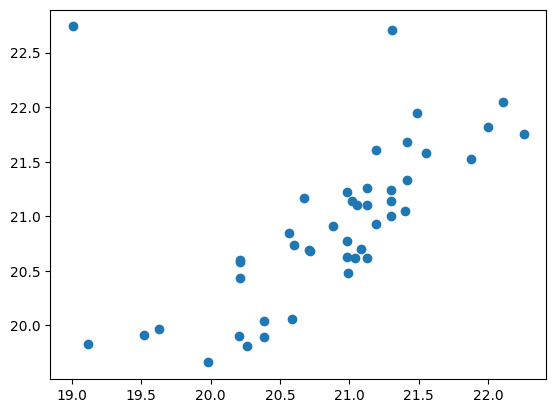

In [224]:
plt.scatter(y_test, reg_pred)

Evaluate Predictions: Performance Metrics with Visualization 

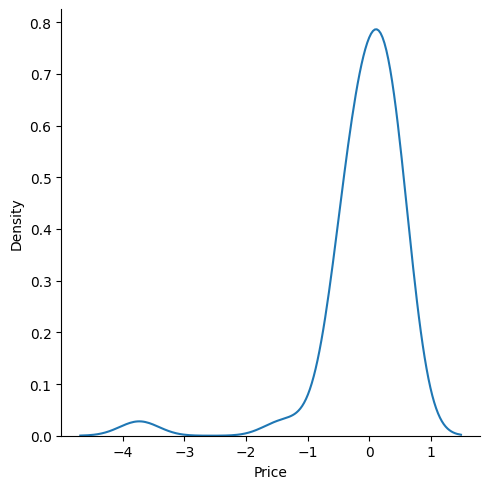

In [227]:
#residuals
residuals=y_test-reg_pred

#plot the residuals
sns.displot(residuals, kind="kde")

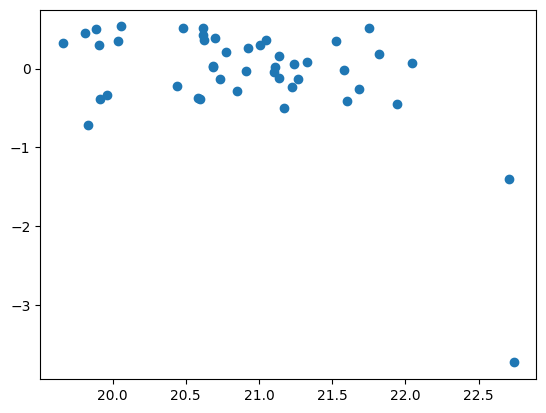

In [228]:
#scatter plot with respect to prediction and residuals
#need to get uniform distribution
plt.scatter(reg_pred, residuals)

In [229]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_squared_error(y_test, reg_pred))
print(mean_absolute_error(y_test, reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.46012419665377013
0.3881231373896575
0.6783245511211946


In [230]:
#R2 score and Adjusted R square
from sklearn.metrics import r2_score
score=r2_score(y_test, reg_pred)
print(score)

0.07803716929240279


Cross Validations


Pickling the Model File

# FIN